In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
LO_MULTIP = 5
HI_MULTIP = 20
ROWS = 100
COLS = 2

Lower_Stack = np.abs(np.random.randn(ROWS, COLS) * LO_MULTIP)
Higher_Stack = np.abs(np.random.randn(ROWS, COLS) * HI_MULTIP)
X = np.vstack([Lower_Stack, Higher_Stack])
Y = np.hstack([[0] * ROWS, [1] * ROWS])
dataset = pd.DataFrame(X, columns = {"X1", "X2"})
dataset["Y"] = Y

dataset

,X2,X1,Y
0,3.412018,0.502556,0
1,7.559943,6.358668,0
2,1.058284,3.590040,0
3,2.972974,0.970880,0
4,3.092505,0.131623,0
...,...,...,...
195,5.960426,7.306802,1
196,46.191119,9.770972,1
197,9.150791,61.617757,1
198,0.473100,4.950031,1


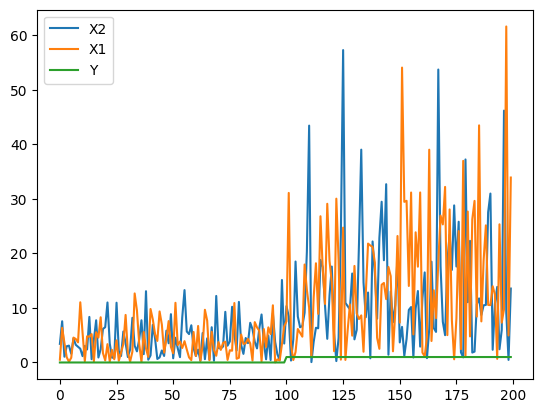

In [3]:
plt.plot(dataset, label="Inline Label")
plt.legend(["X2", "X1", "Y"])

In [4]:
Z = np.zeros((ROWS * 2, COLS))
for i in range(ROWS * 2):
    Z[i, Y[i]] = 1

Z

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [5]:
Wi_1 = np.random.randn(3, 2)
Bi_1 = np.random.randn(3)
Wi_2 = np.random.randn(3, 2)
Bi_2 = np.random.randn(2)

Wi_1, Bi_1, Wi_2, Bi_2

(array([[ 0.47498237,  0.54323394],
        [ 1.41962783, -0.29245496],
        [ 0.55235293,  1.38262509]]),
 array([-1.26029375,  0.88632387,  1.15907597]),
 array([[ 1.2061555 , -0.86762154],
        [-0.05777607,  0.76118678],
        [ 0.62717168,  0.54681261]]),
 array([-1.3212754 , -1.04324335]))

In [6]:
def forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2):
    #first layer
    M = 1 / (1 + np.exp(-(X.dot(Wi_1.T) + Bi_1)))

    # second layer
    A = M.dot(Wi_2) + Bi_2 

    expA = np.exp(A)

    Y = expA / expA.sum(axis=1, keepdims=True)

    return Y, M

In [7]:
forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)

(array([[0.58401133, 0.41598867],
        [0.74093489, 0.25906511],
        [0.67795513, 0.32204487],
        [0.59018598, 0.40981402],
        [0.54120969, 0.45879031],
        [0.51016854, 0.48983146],
        [0.72851898, 0.27148102],
        [0.71679086, 0.28320914],
        [0.70052343, 0.29947657],
        [0.77493071, 0.22506929],
        [0.74913884, 0.25086116],
        [0.54537513, 0.45462487],
        [0.71929437, 0.28070563],
        [0.74011645, 0.25988355],
        [0.75798804, 0.24201196],
        [0.60399969, 0.39600031],
        [0.7404095 , 0.2595905 ],
        [0.72455086, 0.27544914],
        [0.75710081, 0.24289919],
        [0.71365734, 0.28634266],
        [0.69283497, 0.30716503],
        [0.74093251, 0.25906749],
        [0.5677726 , 0.4322274 ],
        [0.59590546, 0.40409454],
        [0.46046215, 0.53953785],
        [0.74129535, 0.25870465],
        [0.49723051, 0.50276949],
        [0.56665452, 0.43334548],
        [0.7274084 , 0.2725916 ],
        [0.745

In [8]:
def diff_Wi_2(H, Z, Y):
    return H.T.dot(Z-Y)

def diff_Wi_1(X, H, Z, output, Wi_2):
    dZ = (Z - output).dot(Wi_2.T) * H * (1-H)
    return X.T.dot(dZ)

def diff_B2(Z, Y):
    return (Z - Y).sum(axis=0)

def diff_B1(Z, Y, Wi_2, H):
    return ((Z - Y).dot(Wi_2.T) * H * (1 - H)).sum(axis=0)

In [9]:
learning_rate = 1e-3

for epoch in range(15000):
    output, hidden = forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)
    Wi_2 += learning_rate * diff_Wi_2(hidden, Z, output)
    Bi_2 += learning_rate * diff_B2(Z, output)
    Wi_1 += learning_rate * diff_Wi_1(X, hidden, Z, output, Wi_2).T
    Bi_1 += learning_rate * diff_B1(Z, output, Wi_2, hidden)

In [10]:
X_test = np.array([8, 15])

hidden_output = 1 / (1 + np.exp(-X_test.dot(Wi_1.T) - Bi_1))
Outer_layer_output = hidden_output.dot(Wi_2) + Bi_2 
expA = np.exp(Outer_layer_output)
Y = expA / expA.sum()
print(f"prob of class 0 > {Y[0]}\nprob of class 1 > {Y[1]}")

prob of class 0 > 0.03414993177691673
prob of class 1 > 0.9658500682230832
